In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

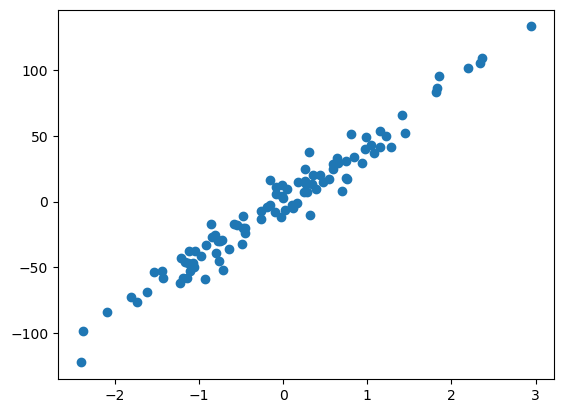

In [18]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [22]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [24]:
y = y.reshape(-1, 1)
y.shape

(100, 1)

In [156]:
X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
X

array([[ 2.49287522e-01,  1.00000000e+00],
       [-2.69066606e-01,  1.00000000e+00],
       [-1.05410171e+00,  1.00000000e+00],
       [ 4.75134979e-01,  1.00000000e+00],
       [-2.40892378e+00,  1.00000000e+00],
       [ 7.44171806e-01,  1.00000000e+00],
       [ 5.90114013e-01,  1.00000000e+00],
       [ 8.05134668e-01,  1.00000000e+00],
       [-4.48783701e-01,  1.00000000e+00],
       [ 1.03919311e+00,  1.00000000e+00],
       [-1.64600652e-03,  1.00000000e+00],
       [ 1.02608379e-01,  1.00000000e+00],
       [-1.60396256e-01,  1.00000000e+00],
       [ 2.78213533e-01,  1.00000000e+00],
       [-1.21928292e+00,  1.00000000e+00],
       [-1.43480463e+00,  1.00000000e+00],
       [-1.61356765e+00,  1.00000000e+00],
       [-1.13820094e+00,  1.00000000e+00],
       [-1.04614812e+00,  1.00000000e+00],
       [-4.81735494e-01,  1.00000000e+00],
       [ 1.22405598e+00,  1.00000000e+00],
       [ 1.44645872e+00,  1.00000000e+00],
       [-9.52867849e-02,  1.00000000e+00],
       [ 2.

In [158]:
theta = np.random.randn(x.shape[1]+1, 1)
theta

array([[-0.92792544],
       [-0.97629215]])

In [160]:
def modele(X, theta):
    return X.dot(theta)

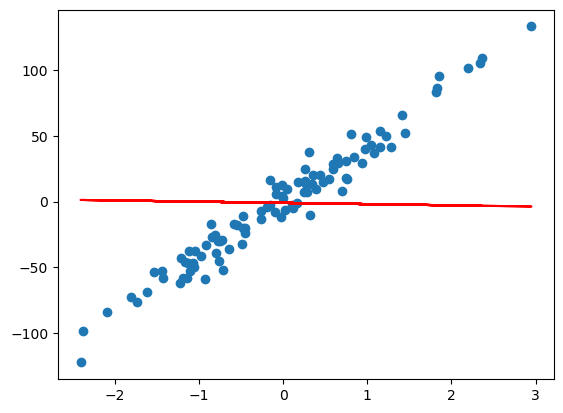

In [162]:
plt.scatter(x, y)
plt.plot(x, modele(X, theta), c='r')

## Fonction coût

In [164]:
def cout_function(X, y, theta):
    n = len(y)
    return 1/(2*n)*np.sum((modele(X, theta) - y)**2)

In [166]:
cout_function(X, y, theta)

1132.5638601510616

## Gradient et Descente de Gradient

In [169]:
def grad(X, y, theta):
    n = len(y)
    return 1/n * X.T.dot(modele(X, theta) - y)

In [171]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cout_function(X, y, theta)
    
    return theta, cost_history

## Machine Learning

In [200]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.0001, n_iterations=100000)

In [202]:
theta_final

array([[43.11498842],
       [ 0.4717057 ]])

In [204]:
cost_history.min()

43.86407561189551

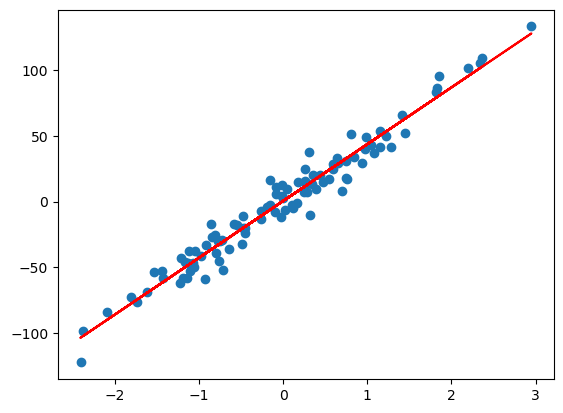

In [206]:
predictions = modele(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

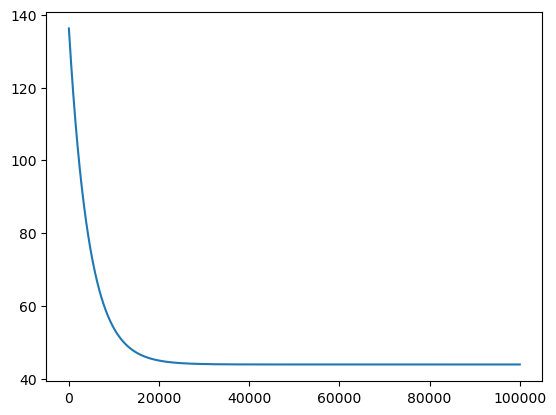

In [210]:
plt.plot(range(100000), cost_history)

In [212]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [214]:
coef_determination(y, predictions)

0.9596522139706092